<a href="https://colab.research.google.com/github/Direspecific/CCMACLRL_EXERCISE_COM221ML/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [24]:
#put your answer here
df = pd.read_csv("iris.csv")
df.value_counts()


,,,,,,count
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
95,5.6,2.7,4.2,1.3,Iris-versicolor,1
97,5.7,2.9,4.2,1.3,Iris-versicolor,1
98,6.2,2.9,4.3,1.3,Iris-versicolor,1
99,5.1,2.5,3.0,1.1,Iris-versicolor,1
...,...,...,...,...,...,...
51,7.0,3.2,4.7,1.4,Iris-versicolor,1
52,6.4,3.2,4.5,1.5,Iris-versicolor,1
53,6.9,3.1,4.9,1.5,Iris-versicolor,1


In [25]:
df.drop(columns='Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Visualize the dataset

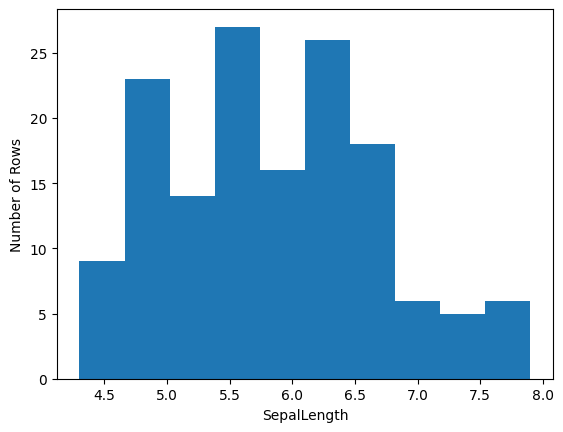

In [35]:
# put your answer here
plt.hist(df['SepalLengthCm'])
plt.xlabel('SepalLength')
plt.ylabel('Number of Rows')
plt.show()

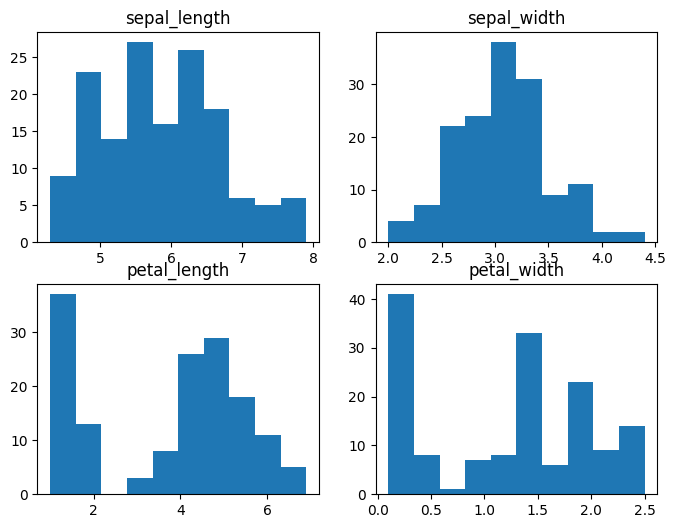

In [38]:
fig, ax=plt.subplots(2,2, figsize=(8,6))
ax[0,0].hist(df['SepalLengthCm'])
ax[0,1].hist(df['SepalWidthCm'])
ax[1,0].hist(df['PetalLengthCm'])
ax[1,1].hist(df['PetalWidthCm'])

ax[0,0].set_title('sepal_length')
ax[0,1].set_title('sepal_width')
ax[1,0].set_title('petal_length')
ax[1,1].set_title('petal_width')

plt.show()

In [40]:
colors = {'Iris-setosa':'red',
          'Iris-virginica':'blue',
          'Iris-versicolor': 'green'}

<function matplotlib.pyplot.show(close=None, block=None)>

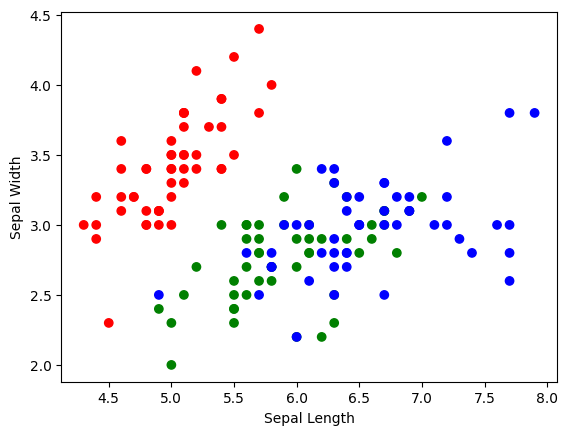

In [43]:
plt.scatter(df['SepalLengthCm'],
            df['SepalWidthCm'],
            c=df['Species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

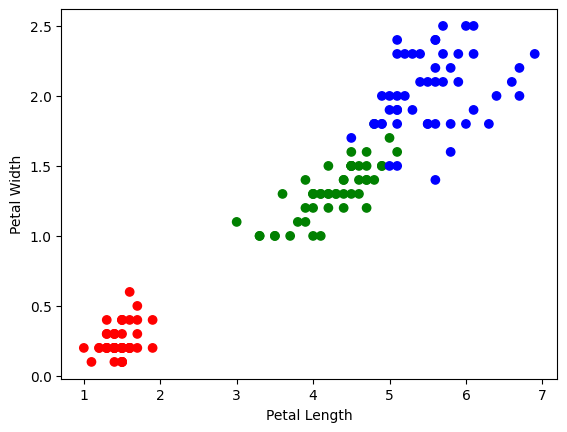

In [42]:
plt.scatter(df['PetalLengthCm'],
            df['PetalWidthCm'],
            c=df['Species'].map(colors))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show

4. Split the dataset into a training set and a testing set

In [52]:
# put your answer here

# array of features
X=df.drop(columns=['Species']).values

# array of labels
y=df['Species'].values

print(X.ndim)
print(X.shape)
print(X)
print(y.ndim)
print(y.shape)
print(y)

2
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


5. Train the model

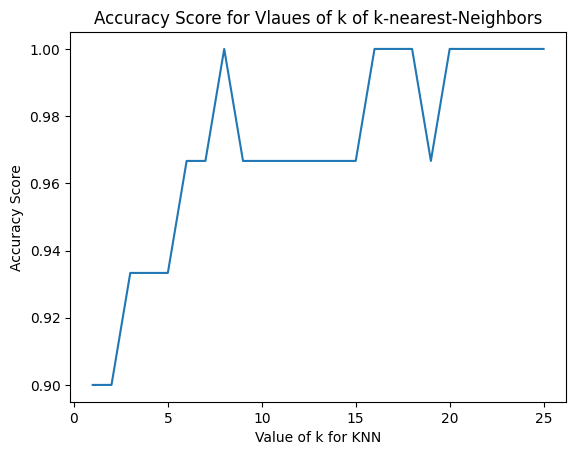

In [56]:
# put your answer here

# experimenting with different n values
k_range=list(range(1,26))
scores=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)

  #train model
  knn.fit(X_train, y_train)

  #test the model

  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Vlaues of k of k-nearest-Neighbors')
plt.show()

6. Test the model

In [63]:
# put your answer here


knn=KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [64]:
knn.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)